In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import shapiro, ttest_ind
from scipy import stats
from matplotlib.gridspec import GridSpec
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statannotations.Annotator import Annotator

colors = np.array([(5,142,63),(4,119,59),(3,96,22),(3,68,12),(46,0,20)])/255

color_RB = np.array([255,0,0])/255
color_RH = np.array([255,70,70])/255
color_RT = np.array([255,130,130])/255
color_avT = np.array([100, 100, 100])/255
color_Av = np.array([70, 70, 70])/255

In [3]:
df = pd.read_csv("Data/AVRIL 25 - Complete Data.csv")

#Conversion to float
str_to_float = ["Masse sèche (g)","Epaisseur (um)","Surface (cm2)"]
for col in str_to_float:
    df[col] = df[col].str.replace(',', '.').astype(float)

# Compute SLA
df['SLA'] =  df['Surface (cm2)']/df['Masse sèche (g)']

# Sort by station
df["Station"] = ['Rhizo Bas']*16 + ['Rhizo Haut']*16 + ["Rhizo Transition"] * 12 + ["Avicennia Transition"] * 12 + ["Avicennia"] * 12



Compute statistical parameters for each station

In [4]:
df_plot = df[['Station', 'SLA']].copy()

RhBas = df_plot[df_plot['Station']=='Rhizo Bas']['SLA']
RhHaut = df_plot[df_plot['Station']=='Rhizo Haut']['SLA']
RhTransi = df_plot[df_plot['Station']=='Rhizo Transition']['SLA']
AvTransi = df_plot[df_plot['Station']=='Avicennia Transition']['SLA']
Av = df_plot[df_plot['Station']=='Avicennia']['SLA']

mean_RB, std_RhB,shap_RB = RhBas.mean(), RhBas.std(),shapiro(RhBas).pvalue
mean_RH, std_RhH, shap_RH = RhHaut.mean(), RhHaut.std(),shapiro(RhHaut).pvalue
mean_RhT, std_RhT, shap_RhT = RhTransi.mean(), RhTransi.std(),shapiro(RhTransi).pvalue
mean_AvT, std_AvT, shap_AvT = AvTransi.mean(), AvTransi.std(),shapiro(AvTransi).pvalue
mean_Avi, std_Avi, shap_Avi = Av.mean(), Av.std(),shapiro(Av).pvalue




Plot each distribution

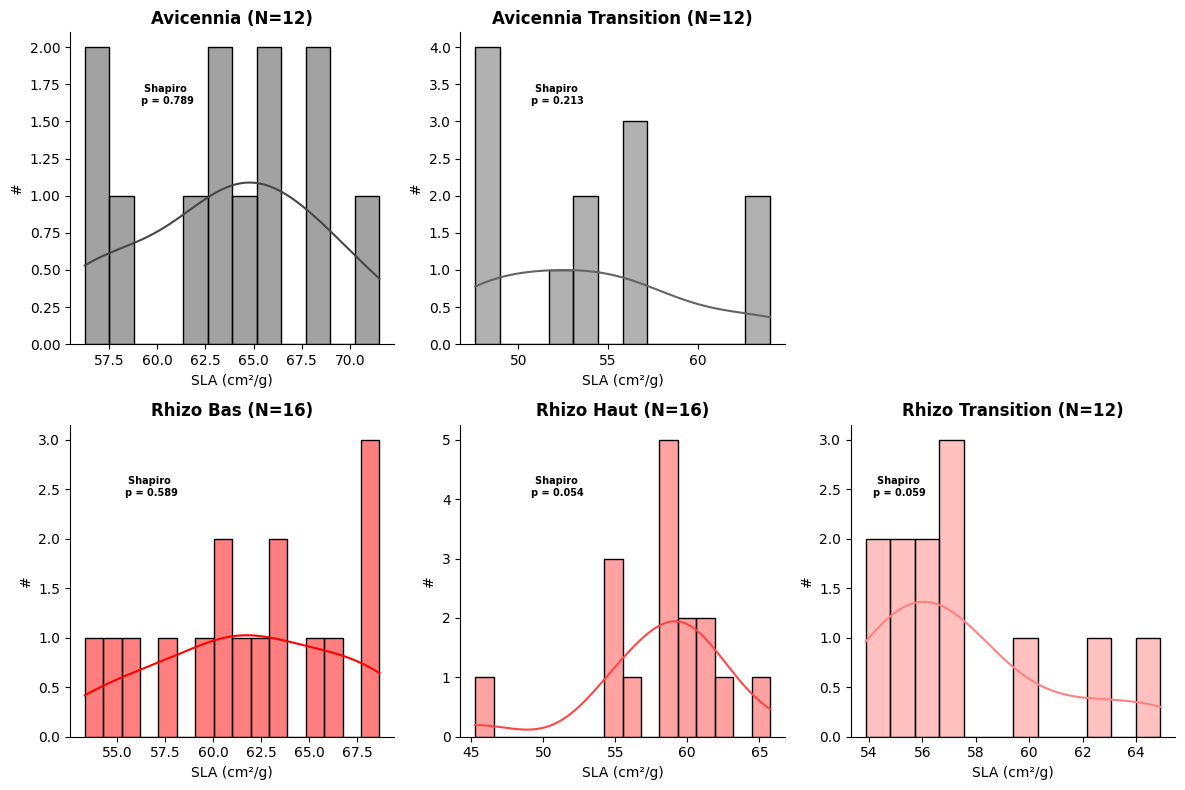

In [5]:
fig = plt.figure(figsize=(12, 8))
gs = GridSpec(2, 3, figure=fig)

ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[1, 0])
ax4 = fig.add_subplot(gs[1, 1])
ax5 = fig.add_subplot(gs[1, 2])

sns.histplot(df_plot[df_plot["Station"] == "Avicennia"]["SLA"],ax=ax1, kde=True, bins=12, color=color_Av)
sns.histplot(df_plot[df_plot["Station"] == "Avicennia Transition"]["SLA"],ax=ax2, kde=True, bins=12, color=color_avT)
sns.histplot(df_plot[df_plot["Station"] == "Rhizo Bas"]["SLA"],ax=ax3, kde=True, bins=16, color=color_RB)
sns.histplot(df_plot[df_plot["Station"] == "Rhizo Haut"]["SLA"],ax=ax4, kde=True, bins=16, color=color_RH)
sns.histplot(df_plot[df_plot["Station"] == "Rhizo Transition"]["SLA"],ax=ax5, kde=True, bins=12, color=color_RT)



ax1.set_xlabel("SLA (cm²/g)")
ax1.set_ylabel("#")
ax1.text(0.3, 0.8, f"Shapiro \np = {shap_Avi:.3f}",ha='center', va='center', transform=ax1.transAxes, fontsize=7, fontweight='bold')
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.set_title("Avicennia (N=12)", fontweight='bold')

ax2.set_xlabel("SLA (cm²/g)")
ax2.set_ylabel("#")
ax2.text(0.3, 0.8, f"Shapiro \np = {shap_AvT:.3f}",ha='center', va='center', transform=ax2.transAxes, fontsize=7, fontweight='bold')
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.set_title("Avicennia Transition (N=12)", fontweight='bold')

ax3.set_xlabel("SLA (cm²/g)")
ax3.set_ylabel("#")
ax3.text(0.25, 0.8, f"Shapiro \np = {shap_RB:.3f}",ha='center', va='center', transform=ax3.transAxes, fontsize=7, fontweight='bold')
ax3.spines['right'].set_visible(False)
ax3.spines['top'].set_visible(False)
ax3.set_title("Rhizo Bas (N=16)", fontweight='bold')

ax4.set_xlabel("SLA (cm²/g)")
ax4.set_ylabel("#")
ax4.text(0.3, 0.8, f"Shapiro \np = {shap_RH:.3f}",ha='center', va='center', transform=ax4.transAxes, fontsize=7, fontweight='bold')
ax4.spines['right'].set_visible(False)
ax4.spines['top'].set_visible(False)
ax4.set_title("Rhizo Haut (N=16)", fontweight='bold')

ax5.set_xlabel("SLA (cm²/g)")
ax5.set_ylabel("#")
ax5.text(0.15, 0.8, f"Shapiro \np = {shap_RhT:.3f}",ha='center', va='center', transform=ax5.transAxes, fontsize=7, fontweight='bold')
ax5.spines['right'].set_visible(False)
ax5.spines['top'].set_visible(False)
ax5.set_title("Rhizo Transition (N=12)", fontweight='bold')

plt.tight_layout()

# plt.savefig("Plot/SLA_distribution_histograms.pdf", dpi=500, bbox_inches='tight')

Violin plots all stations

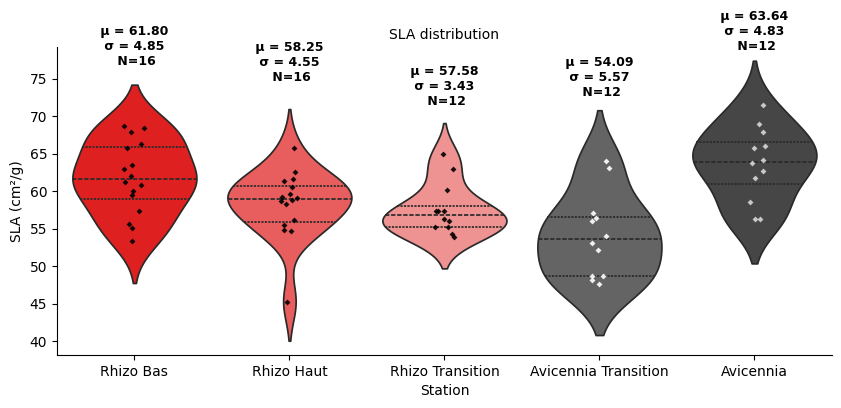

In [6]:
fig = plt.figure(figsize=(10, 4))
ax = fig.subplots(1, 1)  
station_order = ['Rhizo Bas', 'Rhizo Haut', 'Rhizo Transition', 'Avicennia Transition', 'Avicennia']

sns.violinplot(
    data=df_plot,
    x='Station',
    y= 'SLA',
    hue='Station',
    ax=ax,
    inner="quart",
    palette=[color_RB, color_RH, color_RT, color_avT, color_Av], 
    order=station_order
)

sns.stripplot(
    data=df_plot[df_plot["Station"] == 'Avicennia'],
    x='Station',
    y='SLA',
    ax=ax,
    marker='D',
    color='white',  
    size=3,
    alpha=0.7,
    jitter=0.07,
    order=station_order
)

sns.stripplot(
    data=df_plot[df_plot["Station"] == 'Avicennia Transition'],
    x='Station',
    y='SLA',
    ax=ax,
    marker='D',
    color='white',  
    size=3,
    alpha=0.9,
    jitter=0.07,
    order=station_order
)

sns.stripplot(
    data=df_plot[df_plot["Station"] == 'Rhizo Transition'],
    x='Station',
    y='SLA',
    ax=ax,
    marker='D',
    color='k',  
    size=3,
    alpha=0.9,
    jitter=0.07,
    order=station_order
)

sns.stripplot(
    data=df_plot[df_plot["Station"] == 'Rhizo Haut'],
    x='Station',
    y='SLA',
    ax=ax,
    marker='D',
    color='k',  
    size=3,
    alpha=0.9,
    jitter=0.07,
    order=station_order
)

sns.stripplot(
    data=df_plot[df_plot["Station"] == 'Rhizo Bas'],
    x='Station',
    y='SLA',
    ax=ax,
    marker='D',
    color='k',  
    size=3,
    alpha=0.9,
    jitter=0.07,
    order=station_order
)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_title("SLA distribution", fontsize=10)
ax.set_ylabel("SLA (cm²/g)")
ax.text(0.1, 1, f" µ = {mean_RB:.2f} \n σ = {std_RhB:.2f} \n N=16",ha='center', va='center', transform=ax.transAxes, fontsize=9, fontweight='bold')
ax.text(0.3, .95, f" µ = {mean_RH:.2f} \n σ = {std_RhH:.2f} \n N=16",ha='center', va='center', transform=ax.transAxes, fontsize=9, fontweight='bold')
ax.text(0.5, .87, f" µ = {mean_RhT:.2f} \n σ = {std_RhT:.2f} \n N=12",ha='center', va='center', transform=ax.transAxes, fontsize=9, fontweight='bold')
ax.text(0.7, .9, f" µ = {mean_AvT:.2f} \n σ = {std_AvT:.2f} \n N=12",ha='center', va='center', transform=ax.transAxes, fontsize=9, fontweight='bold')
ax.text(0.9, 1.05, f" µ = {mean_Avi:.2f} \n σ = {std_Avi:.2f} \n N=12",ha='center', va='center', transform=ax.transAxes, fontsize=9, fontweight='bold');

# plt.savefig("Plot/SLA_distribution_violin.pdf", dpi=500, bbox_inches='tight')

$\textbf{Statistical comparison between the \textit{Rhizophora} stations}$

ANOVA 

In [7]:
f_stat_rh, p_value_rh = stats.f_oneway(RhBas, RhHaut, RhTransi)
print(f"F-statistic: {f_stat_rh:.3f}, p-value: {p_value_rh:.6f}")

F-statistic: 3.957, p-value: 0.026837


TUKEY'S TEST

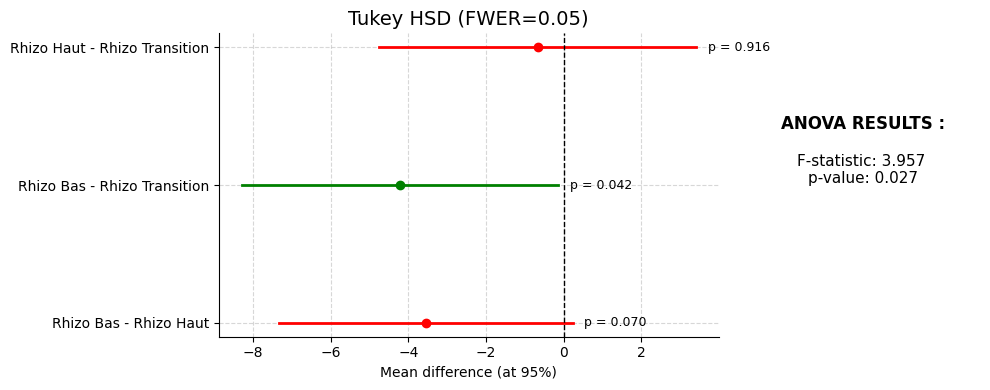

In [8]:
df_rhizo = df[df['Station'].isin(['Rhizo Bas', 'Rhizo Haut', 'Rhizo Transition'])]

tukey = pairwise_tukeyhsd(endog=df_rhizo['SLA'], groups=df_rhizo['Station'], alpha=0.05)
data = tukey.summary().data
tukey_data = pd.DataFrame({
    'group1': [ e[0] for e in data[1:]] ,
    'group2': [ e[1] for e in data[1:]],
    'meandiff': [float(e[2]) for e in data[1:]],
    'p-adj': [float(e[3]) for e in data[1:]],
    'lower': [float(e[4]) for e in data[1:]],
    'upper': [float(e[5]) for e in data[1:]],
    'reject': [e[6] for e in data[1:]],  
})

# Adding a new column for the comparison
tukey_data["comparison"] = tukey_data["group1"] + " - " + tukey_data["group2"]

# Plot
fig = plt.figure(figsize=(10, 4))
gs = GridSpec(1, 2, width_ratios=[3, 1])  
ax_plot = fig.add_subplot(gs[0])  
ax_text = fig.add_subplot(gs[1])  

# Color mapping based on rejection
colors = tukey_data["reject"].map({True: "green", False: "red"})

# Plotting the Tukey HSD results
for i, row in tukey_data.iterrows():
    ax_plot.plot([row["lower"], row["upper"]], [i, i], color=colors[i], linewidth=2)
    ax_plot.plot(row["meandiff"], i, "o", color=colors[i], markersize=6)
    ax_plot.text(row["upper"] + 0.3, i, f"p = {row['p-adj']:.3f}", va="center", fontsize=9, color="black")

ax_plot.axvline(x=0, color='black', linestyle='--', linewidth=1)
ax_plot.set_yticks(range(len(tukey_data)))
ax_plot.set_yticklabels(tukey_data["comparison"])
ax_plot.set_xlabel("Mean difference (at 95%)")
ax_plot.set_title("Tukey HSD (FWER=0.05)", fontsize=14)
ax_plot.spines['right'].set_visible(False)
ax_plot.spines['top'].set_visible(False)
ax_plot.grid(True, linestyle='--', alpha=0.5)

ax_text.text(0.3, 0.7, "ANOVA RESULTS :", 
             horizontalalignment='center', verticalalignment='center', 
             fontsize=12, color="black",fontweight='bold',  transform=ax_text.transAxes)

ax_text.text(0.3, 0.55, f"F-statistic: {f_stat_rh:.3f} \np-value: {p_value_rh:.3f}",
             horizontalalignment='center', verticalalignment='center', 
             fontsize=11, color="black", transform=ax_text.transAxes)

ax_text.axis('off')


plt.tight_layout()
# plt.savefig("Plot/Tukey_HSD_Rhizo.pdf", dpi=500, bbox_inches='tight')

$\textbf{Statistical comparison between the \textit{Avicennia} stations}$

T-TEST

In [9]:
t_stat_av, p_value_av = ttest_ind(Av, AvTransi, equal_var=False)
print(f"t-statistic: {t_stat_av:.3f}, p-value: {p_value_av:.5f}")

t-statistic: 4.490, p-value: 0.00019


$\textbf{Statistical comparison between all stations}$

ANOVA

In [10]:
f_stat_all, p_value_all = stats.f_oneway(RhBas, RhHaut, RhTransi, AvTransi, Av)
print(f"F-statistic: {f_stat_all:.3f}, p-value: {p_value_all:.6f}")

F-statistic: 7.983, p-value: 0.000028


TUCKEY'S TEST

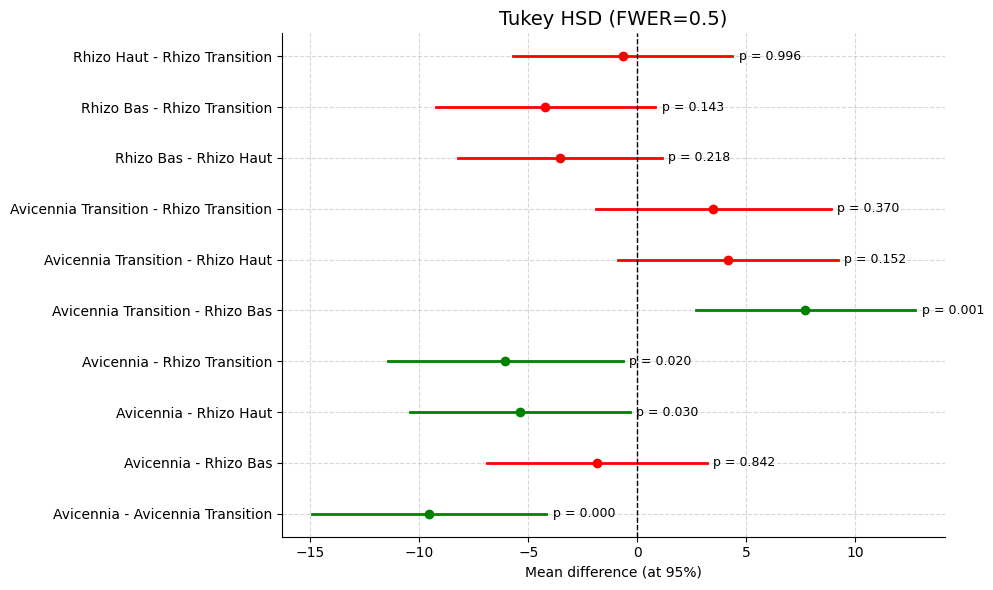

In [11]:
tukey = pairwise_tukeyhsd(endog=df_plot['SLA'], groups=df_plot['Station'], alpha=0.05)
data = tukey.summary().data

tukey_data = pd.DataFrame({
    'group1': [ e[0] for e in data[1:]] ,
    'group2': [ e[1] for e in data[1:]],
    'meandiff': [float(e[2]) for e in data[1:]],
    'p-adj': [float(e[3]) for e in data[1:]],
    'lower': [float(e[4]) for e in data[1:]],
    'upper': [float(e[5]) for e in data[1:]],
    'reject': [e[6] for e in data[1:]],  # conversion string -> bool
})

# Adding a new column for the comparison
tukey_data["comparison"] = tukey_data["group1"] + " - " + tukey_data["group2"]

#Plot
fig = plt.figure(figsize=(10, 6))
ax = fig.subplots(1, 1)

# Color mapping based on rejection
colors_reject = tukey_data["reject"].map({True: "green", False: "red"})


# Plotting the Tukey HSD results
for i, row in tukey_data.iterrows():
    ax.plot([row["lower"], row["upper"]], [i, i], color=colors_reject[i], linewidth=2)
    ax.plot(row["meandiff"], i, "o", color=colors_reject[i], markersize=6)
    ax.text(row["upper"] + 0.3, i, f"p = {row['p-adj']:.3f}", va="center", fontsize=9, color="black")

ax.axvline(x=0, color='black', linestyle='--', linewidth=1)
ax.set_yticks(range(len(tukey_data)), tukey_data["comparison"])
ax.set_xlabel("Mean difference (at 95%)")
ax.set_title("Tukey HSD (FWER=0.5)", fontsize=14)
ax.grid(True, linestyle='--', alpha=0.5)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)


plt.tight_layout()
# plt.savefig("Plot/Complete_Tukey_HSD.pdf", dpi=500, bbox_inches='tight')



p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Rhizo Bas vs. Rhizo Haut: Custom statistical test, P_val:6.950e-02
Rhizo Haut vs. Rhizo Transition: Custom statistical test, P_val:9.163e-01
Rhizo Bas vs. Rhizo Transition: Custom statistical test, P_val:4.150e-02


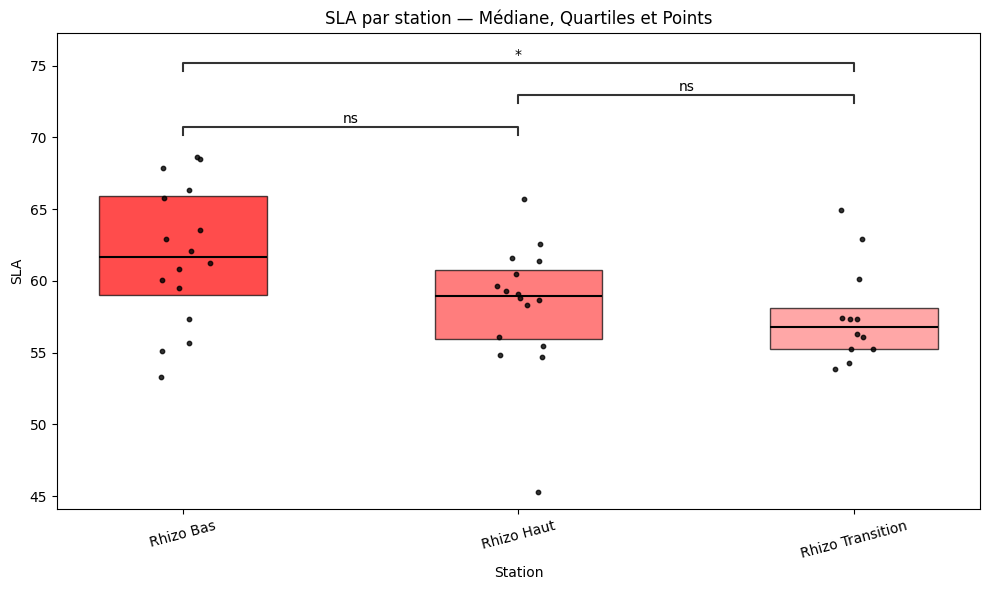

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statannotations.Annotator import Annotator

# Suppose que ton DataFrame s'appelle `df`
# Exemple minimal si tu veux tester :
# df = pd.DataFrame({
#     "station": np.random.choice(["Rhizo Bas", "Rhizo Haut", "Rhizo Transition"], 90),
#     "SLA": np.random.normal(20, 5, 90)
# })
df = df_rhizo
x = "Station"
y = "SLA"
order = ["Rhizo Bas", "Rhizo Haut", "Rhizo Transition"]
comparisons = [("Rhizo Bas", "Rhizo Haut"), ("Rhizo Haut", "Rhizo Transition"), ("Rhizo Bas", "Rhizo Transition")]

# Initialisation figure
plt.figure(figsize=(10, 6))
ax = plt.gca()

bar_width = 0.5
point_jitter = 0.08

# Couleurs
bar_color = [color_RB, color_RH, color_RT]
median_color = "darkgreen"
point_color = "black"

# Tracer les barres et les points
for i, group in enumerate(order):
    data_group = df[df[x] == group][y]
    median = np.median(data_group)
    q1 = np.percentile(data_group, 25)
    q3 = np.percentile(data_group, 75)

    # Rectangle de Q1 à Q3
    ax.bar(i, q3 - q1, bottom=q1, width=bar_width, color=bar_color[i], alpha=0.7, edgecolor="black")

    # Ligne de la médiane
    ax.hlines(median, i - bar_width / 2, i + bar_width / 2, color='k', linewidth=1.5)

    # Points en transparence
    jittered_x = i + np.random.uniform(-point_jitter, point_jitter, size=len(data_group))
    ax.scatter(jittered_x, data_group, alpha=0.8, color=point_color, s=10)

# Axe X
ax.set_xticks(range(len(order)))
ax.set_xticklabels(order, rotation=15)
ax.set_xlabel("Station")
ax.set_ylabel("SLA")
ax.set_title("SLA par station — Médiane, Quartiles et Points")

# Test de Tukey HSD
tukey = pairwise_tukeyhsd(endog=df[y], groups=df[x], alpha=0.05)
tukey_df = pd.DataFrame(data=tukey._results_table.data[1:], columns=tukey._results_table.data[0])
pval_dict = {
    (row['group1'], row['group2']): row['p-adj']
    for _, row in tukey_df.iterrows()
}
pval_dict.update({(b, a): p for (a, b), p in pval_dict.items()})  # rendre les paires symétriques

# Ajouter les annotations
annotator = Annotator(ax, pairs=comparisons, data=df, x=x, y=y, order=order)
annotator.configure(test=None, text_format="star", verbose=1)
annotator.set_pvalues([pval_dict[pair] for pair in comparisons])
annotator.annotate()

plt.tight_layout()
plt.show()


c:\Users\arthu\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\_core\fromnumeric.py:3860: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\arthu\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\_core\_methods.py:145: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


IndexError: index -1 is out of bounds for axis 0 with size 0

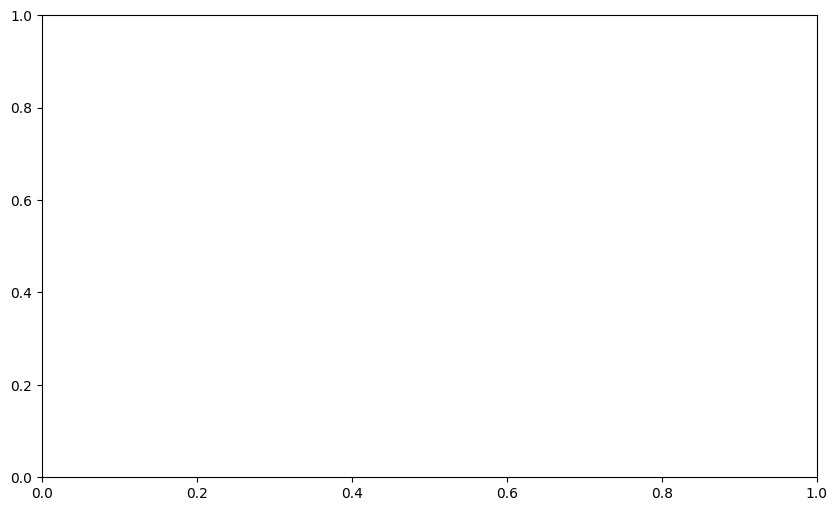

In [13]:

# Suppose que ton DataFrame s'appelle `df`
# Exemple minimal si tu veux tester :
# df = pd.DataFrame({
#     "station": np.random.choice(["Rhizo Bas", "Rhizo Haut", "Rhizo Transition"], 90),
#     "SLA": np.random.normal(20, 5, 90)
# })
df = df[df['Station'].isin(['Avicennia', 'Avicennia Transition'])]

x = "Station"
y = "SLA"
order = ["Avicennia Transition", "Avicennia"]
comparisons = [("Avicennia Transition", "Avicennia")]

# Initialisation figure
plt.figure(figsize=(10, 6))
ax = plt.gca()

bar_width = 0.5
point_jitter = 0.08

# Couleurs
bar_color = [color_avT, color_Av]
median_color = "darkgreen"
point_color = "black"

# Tracer les barres et les points
for i, group in enumerate(order):
    data_group = df[df[x] == group][y]
    median = np.median(data_group)
    q1 = np.percentile(data_group, 25)
    q3 = np.percentile(data_group, 75)

    # Rectangle de Q1 à Q3
    ax.bar(i, q3 - q1, bottom=q1, width=bar_width, color=bar_color[i], alpha=0.9, edgecolor="black")

    # Ligne de la médiane
    ax.hlines(median, i - bar_width / 2, i + bar_width / 2, color='k', linewidth=1.5)

    # Points en transparence
    jittered_x = i + np.random.uniform(-point_jitter, point_jitter, size=len(data_group))
    ax.scatter(jittered_x, data_group, alpha=0.8, color=point_color, s=10)

# Axe X
ax.set_xticks(range(len(order)))
ax.set_xticklabels(order, rotation=15)
ax.set_xlabel("Station")
ax.set_ylabel("SLA")
ax.set_title("SLA par station — Médiane, Quartiles et Points")

# Test de Tukey HSD
tukey = pairwise_tukeyhsd(endog=df[y], groups=df[x], alpha=0.05)
tukey_df = pd.DataFrame(data=tukey._results_table.data[1:], columns=tukey._results_table.data[0])
pval_dict = {
    (row['group1'], row['group2']): row['p-adj']
    for _, row in tukey_df.iterrows()
}
pval_dict.update({(b, a): p for (a, b), p in pval_dict.items()})  # rendre les paires symétriques

# Ajouter les annotations
annotator = Annotator(ax, pairs=comparisons, data=df, x=x, y=y, order=order)
annotator.configure(test=None, text_format="star", verbose=1)
annotator.set_pvalues([pval_dict[pair] for pair in comparisons])
annotator.annotate()

plt.tight_layout()
plt.show()


In [14]:
# Dictionnaire de correspondance station → salinité
salinite_dict = {
    "Rhizo Bas": 39.089,
    "Rhizo Haut": 44.571,
    "Rhizo Transition": 49.630,
    "Avicennia Transition": 49.630,
    "Avicennia": 50.857
}
profondeur_dict = {
    "Rhizo Bas": -3.0,
    "Rhizo Haut": -0.75,
    "Rhizo Transition": -21.0,
    "Avicennia Transition": -21.0,
    "Avicennia": -34.75
}
# Ajout de la colonne 'salinité' en mappant la station
df_plot["salinité"] = df_plot["Station"].map(salinite_dict)
df_plot["Pronfondeur"] = df_plot["Station"].map(profondeur_dict)
df_plot

,Station,SLA,salinité,Pronfondeur
0,Rhizo Bas,68.643956,39.089,-3.00
1,Rhizo Bas,62.084345,39.089,-3.00
2,Rhizo Bas,59.518421,39.089,-3.00
3,Rhizo Bas,60.854620,39.089,-3.00
4,Rhizo Bas,57.358640,39.089,-3.00
...,...,...,...,...
63,Avicennia,56.252448,50.857,-34.75
64,Avicennia,61.778203,50.857,-34.75
65,Avicennia,62.711392,50.857,-34.75
66,Avicennia,58.558413,50.857,-34.75


In [15]:
df

,Individu,Masse sèche (g),Nombre de disque,Epaisseur (um),Surface (cm2),SLA,Station


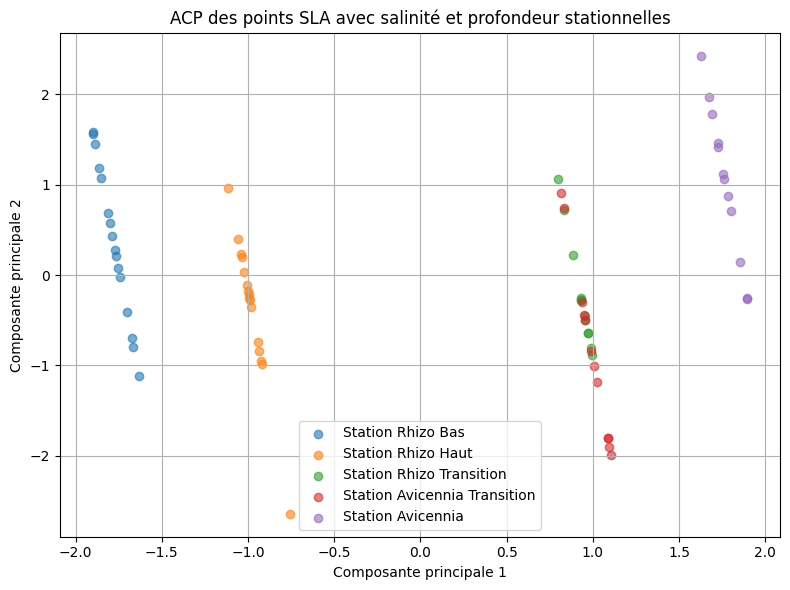

In [16]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


# Données pour la PCA
X = df_plot[['SLA', 'salinité', 'Pronfondeur']]

# Centrage / réduction
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Ajout des composantes principales au DataFrame
df_plot['PC1'] = X_pca[:, 0]
df_plot['PC2'] = X_pca[:, 1]

# Visualisation
plt.figure(figsize=(8,6))
for station in df_plot['Station'].unique():
    subset = df_plot[df_plot['Station'] == station]
    plt.scatter(subset['PC1'], subset['PC2'], label=f'Station {station}', alpha=0.6)

plt.xlabel('Composante principale 1')
plt.ylabel('Composante principale 2')
plt.title('ACP des points SLA avec salinité et profondeur stationnelles')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [17]:
import pandas as pd

# Créer un DataFrame avec les coefficients de chaque variable dans chaque composante
pca_components = pd.DataFrame(
    pca.components_,
    columns=['SLA', 'salinité', 'Pronfondeur'],
    index=['PC1', 'PC2']
)

# Afficher les coefficients (a.k.a. "loadings")
print("Contributions des variables aux composantes principales :")
print(pca_components.T)


Contributions des variables aux composantes principales :
                  PC1       PC2
SLA         -0.097457  0.977683
salinité     0.710416 -0.062625
Pronfondeur -0.697002 -0.200533


In [18]:
import pandas as pd

# Charger le fichier CSV
df = pd.read_csv("Data/AVRIL 25 - Complete Data.csv")

# Renommer les colonnes pour faciliter la manipulation
df.columns = ['Individu', 'Masse_seche_g', 'Nombre_disque', 'Epaisseur_um', 'Surface_cm2']

# Remplacer les virgules par des points et convertir en float
df['Masse_seche_g'] = df['Masse_seche_g'].str.replace(',', '.').astype(float)
df['Surface_cm2'] = df['Surface_cm2'].str.replace(',', '.').astype(float)

# Calculer le SLA
df['SLA'] = df['Surface_cm2'] / df['Masse_seche_g']

# Créer la colonne 'Parcelle' en enlevant les deux derniers caractères de 'Individu'
df['Parcelle'] = df['Individu'].str[:-2]

# Garder uniquement les colonnes utiles
df = df[['Parcelle', 'SLA']]

# Grouper par 'Parcelle' et calculer la moyenne de SLA
df = df.groupby('Parcelle', as_index=False).mean()
df


,Parcelle,SLA
0,AV1,67.235238
1,AV2,66.167595
2,AV3,61.967807
3,AV4,59.198229
4,RB1,66.245640
5,RB2,59.031851
6,RB3,59.939060
7,RB4,61.983758
8,RH1,59.612441
9,RH2,60.319173


In [19]:
df_field = pd.read_csv("Data/Salinte_profondeur.csv")  # Remplace par le nom exact de ton fichier
df_field = df_field.iloc[:, 1:]

df_field["Salinité à -30cm"] = df_field["Salinité à -30cm"].astype(str).str.replace(',', '.')
df_field["Profondeur de la nappe"] = df_field["Profondeur de la nappe"].astype(str).str.replace(',', '.')

df_field = df_field[
    df_field["Salinité à -30cm"].str.replace('.', '', 1).str.isnumeric() &
    df_field["Profondeur de la nappe"].str.replace('-', '', 1).str.replace('.', '', 1).str.isnumeric()
]

df_field["Salinité à -30cm"] = df_field["Salinité à -30cm"].astype(float)
df_field["Profondeur de la nappe"] = df_field["Profondeur de la nappe"].astype(float)
df_field["Date"] = pd.to_datetime(df_field["Date"], dayfirst=True)
df_field["Station"] = df_field["Parcelle"].str.extract(r'([A-Z]+)')


stations = ["RB", "RH", "T", "A"]
dates = sorted(df_field["Date"].unique())
df_field = df_field.drop(columns=['Station'])

# 2. Calculer la moyenne de la salinité par parcelle (sur toutes les dates)
salinite_moyenne = df_field.groupby('Parcelle', as_index=False)['Salinité à -30cm'].mean()

# 3. Extraire les valeurs de profondeur du 16 avril 2025
profondeur_16avril = df_field[df_field['Date'] == '2025-04-16'][['Parcelle', 'Profondeur de la nappe']]

# 4. Fusionner les deux tableaux sur la colonne 'Parcelle'
df__field_final = pd.merge(profondeur_16avril, salinite_moyenne, on='Parcelle', how='inner')
df__field_final

,Parcelle,Profondeur de la nappe,Salinité à -30cm
0,RB1,0.0,39.142857
1,RB2,-4.0,38.500000
2,RB3,-4.0,39.428571
3,RB4,-4.0,39.285714
4,RH1,-3.0,44.142857
5,RH2,1.0,42.428571
6,RH3,-2.0,46.428571
7,RH4,1.0,45.285714
8,T1,-19.0,51.714286
9,T2,-21.0,48.714286


In [20]:
import pandas as pd

# Étape 1 : créer la colonne de correspondance dans df
def match_parcelle(p):
    if p.startswith("T"):
        return p[:2]  # "T1AV" ou "T1Rh" → "T1"
    elif p.startswith("AV"):
        return p.replace("AV", "A")  # "AV1" → "A1"
    else:
        return p  # RB1, RH1, etc.

df['Parcelle_match'] = df['Parcelle'].apply(match_parcelle)

# Étape 2 : renommer la colonne "Parcelle" de df_field_final pour matcher
df_field_final_renamed = df__field_final.rename(columns={'Parcelle': 'Parcelle_match'})

# Étape 3 : fusion
df_merged = df.merge(df_field_final_renamed, on='Parcelle_match', how='left')

# Étape 4 : réorganiser les colonnes
df_merged = df_merged[['Parcelle', 'SLA', 'Profondeur de la nappe', 'Salinité à -30cm']]
df_merged

,Parcelle,SLA,Profondeur de la nappe,Salinité à -30cm
0,AV1,67.235238,-42.0,55.428571
1,AV2,66.167595,-29.0,48.714286
2,AV3,61.967807,-34.0,50.571429
3,AV4,59.198229,-34.0,48.714286
4,RB1,66.245640,0.0,39.142857
5,RB2,59.031851,-4.0,38.500000
6,RB3,59.939060,-4.0,39.428571
7,RB4,61.983758,-4.0,39.285714
8,RH1,59.612441,-3.0,44.142857
9,RH2,60.319173,1.0,42.428571


In [21]:
def get_station_corrected(parcelle):
    if parcelle.startswith("T") and "AV" in parcelle:
        return "Transition AV"
    elif parcelle.startswith("T") and "Rh" in parcelle:
        return "Transition RH"
    elif parcelle.startswith("AV"):
        return "AV"
    elif parcelle.startswith("RB"):
        return "RB"
    elif parcelle.startswith("RH"):
        return "RH"
    else:
        return "Autre"

df_merged['Station'] = df_merged['Parcelle'].apply(get_station_corrected)

df_merged

,Parcelle,SLA,Profondeur de la nappe,Salinité à -30cm,Station
0,AV1,67.235238,-42.0,55.428571,AV
1,AV2,66.167595,-29.0,48.714286,AV
2,AV3,61.967807,-34.0,50.571429,AV
3,AV4,59.198229,-34.0,48.714286,AV
4,RB1,66.245640,0.0,39.142857,RB
5,RB2,59.031851,-4.0,38.500000,RB
6,RB3,59.939060,-4.0,39.428571,RB
7,RB4,61.983758,-4.0,39.285714,RB
8,RH1,59.612441,-3.0,44.142857,RH
9,RH2,60.319173,1.0,42.428571,RH


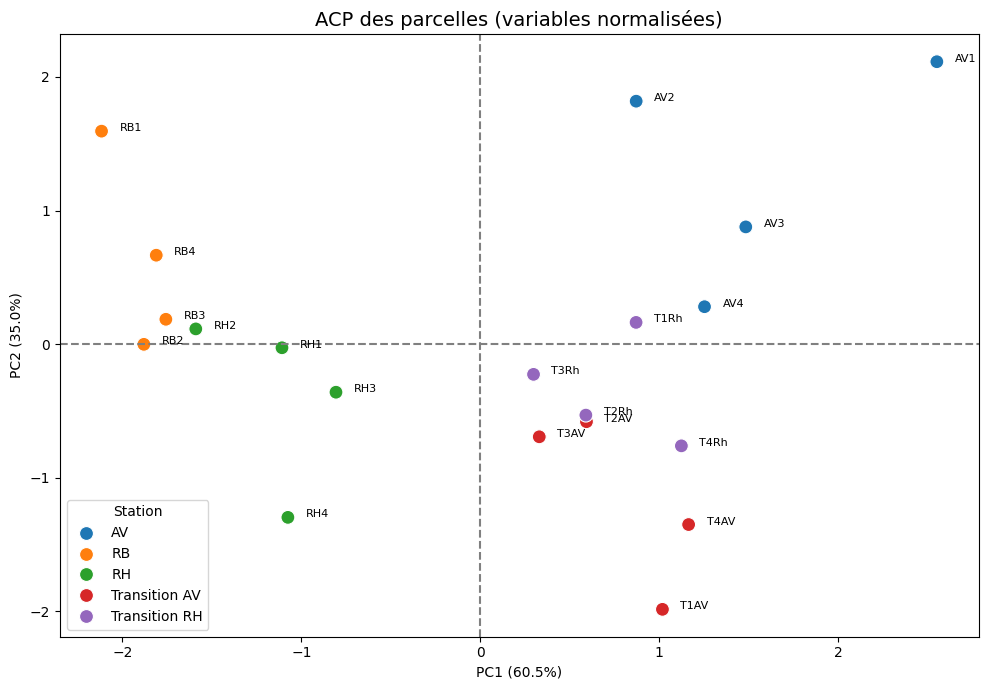

                  PC1       PC2
SLA         -0.097457  0.977683
salinité     0.710416 -0.062625
Pronfondeur -0.697002 -0.200533
Variance expliquée par chaque composante principale: [0.60454429 0.34975052]


In [24]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Sélection et normalisation des données
X = df_merged[['SLA', 'Profondeur de la nappe', 'Salinité à -30cm']]
X_scaled = StandardScaler().fit_transform(X)

# ACP
pca = PCA(n_components=2)
components = pca.fit_transform(X_scaled)

# Création du DataFrame avec les résultats
df_pca = pd.DataFrame(data=components, columns=['PC1', 'PC2'])
df_pca['Station'] = df_merged['Station']
df_pca['Parcelle'] = df_merged['Parcelle']
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='Station', s=100)

for i in range(len(df_pca)):
    plt.text(df_pca['PC1'][i] + 0.1, df_pca['PC2'][i], df_pca['Parcelle'][i], fontsize=8)

plt.title('ACP des parcelles (variables normalisées)', fontsize=14)
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)')
plt.axhline(0, linestyle='--', color='gray')
plt.axvline(0, linestyle='--', color='gray')
plt.legend(title='Station')
plt.tight_layout()
plt.show()
print(pca_components.T)
print("Variance expliquée par chaque composante principale:", pca.explained_variance_ratio_)


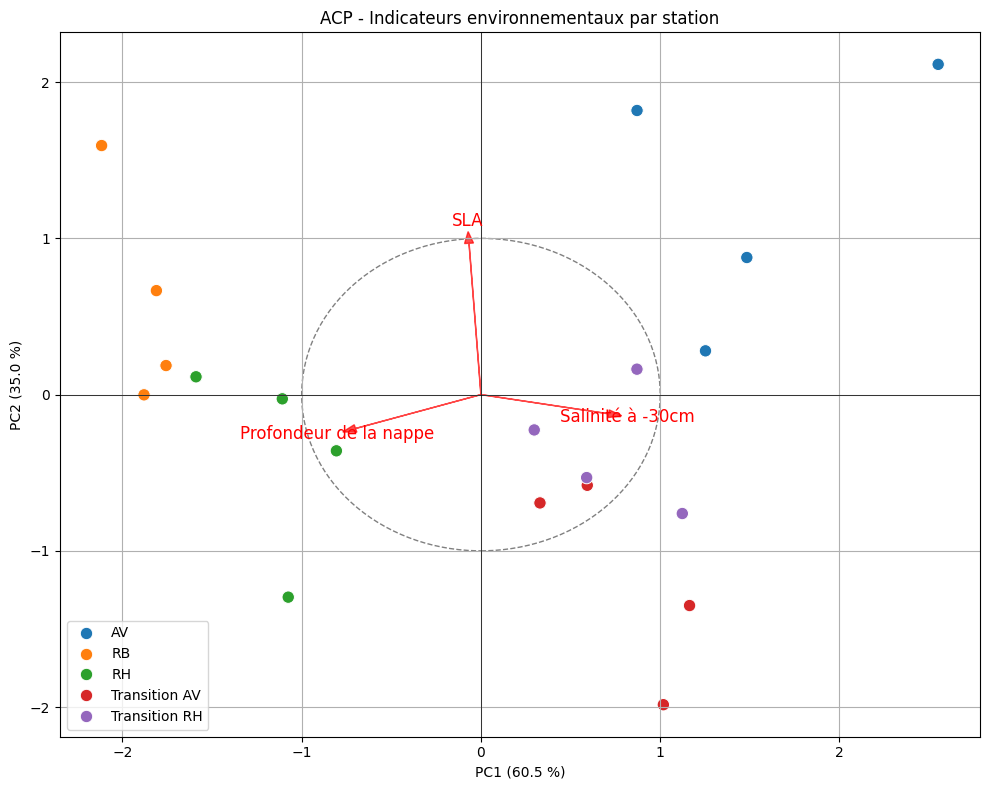

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np

# 1. Données : sélection des colonnes numériques
X = df_merged[['SLA', 'Profondeur de la nappe', 'Salinité à -30cm']]

# 2. Standardisation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. ACP
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 4. Stockage pour affichage
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_pca['Station'] = df_merged['Station'].values
df_pca['Parcelle'] = df_merged['Parcelle'].values

# 5. Cercle de corrélation (coordonnées des vecteurs)
components = pca.components_.T  # shape (variables, 2)
variables = ['SLA', 'Profondeur de la nappe', 'Salinité à -30cm']

# 6. Affichage
plt.figure(figsize=(10, 8))

# a. Scatterplot des individus
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='Station', s=80)

# b. Vecteurs
for i, var in enumerate(variables):
    plt.arrow(0, 0, components[i, 0], components[i, 1], color='red', alpha=0.7, head_width=0.05)
    plt.text(components[i, 0]*1.15, components[i, 1]*1.15, var, color='red', ha='center', va='center', fontsize=12)

# c. Cercle unité
circle = plt.Circle((0, 0), 1, color='gray', fill=False, linestyle='--')
plt.gca().add_patch(circle)

# d. Axes et titre
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.1f} %)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.1f} %)")
plt.title("ACP - Indicateurs environnementaux par station")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
